In [77]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette("tab10")

In [12]:
flip = lambda n: "".join(np.random.choice(['H', 'T'], n))
def who_wins(flips):
    # bob gets a point if he sees the occurrence of 'HT'
    # alice gets a point if she sees the occurrence of 'HH' (overlapping counts as separate occurrences)
    two_grams = [flips[i:i+2] for i in range(len(flips)-1)]
    bob = sum([1 for g in two_grams if g == 'HT'])
    alice = sum([1 for g in two_grams if g == 'HH'])
    if bob > alice:
        return 'bob'
    elif alice > bob:
        return 'alice'
    else:
        return 'tie'
    
def simulate(n, num_trials, numeric = False):
    results = [who_wins(flip(n)) for _ in range(num_trials)]
    bob, alice, tie = 0, 0, 0
    for r in results:
        if r == 'bob':
            bob += 1
        elif r == 'alice':
            alice += 1
        else:
            tie += 1
    bob /= num_trials
    alice /= num_trials
    tie /= num_trials
    if numeric:
        return bob, alice, tie
    print(f"Bob: {bob*100:.2f}%",
          f"\nAlice: {alice*100:.2f}%",
          f"\nTie: {tie*100:.2f}%")

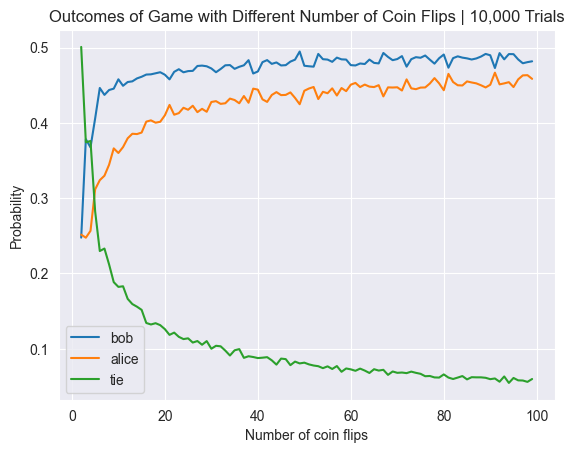

In [132]:


flip_trials = [simulate(n, 10000, numeric = True) for n in range(2, 100)]
sns.lineplot(x=range(2, 100), y=[x[0] for x in flip_trials], label='bob')
sns.lineplot(x=range(2, 100), y=[x[1] for x in flip_trials], label='alice')
sns.lineplot(x=range(2, 100), y=[x[2] for x in flip_trials], label='tie')
plt.xlabel('Number of coin flips')
plt.ylabel('Probability')
plt.title("Outcomes of Game with Different Number of Coin Flips | 10,000 Trials");

In [135]:
simulate(3_000, 10_000)

Bob: 49.68% 
Alice: 49.33% 
Tie: 0.99%


In [130]:
def generate_all_sequences(n):
    """Generates all possible sequences of length n
    For n = 2, returns ['HH', 'HT', 'TH', 'TT']
    For n = 3, returns ['HHH', 'HHT', 'HTH', 'HTT', 'THH', 'THT', 'TTH', 'TTT']
    """
    
    if n == 1:
        return ['H', 'T']
    else:
        return [i + j for i in generate_all_sequences(n-1) for j in ['H', 'T']]
sequences = generate_all_sequences(4)
wins = [who_wins(s) for s in sequences]
for i in range(16):
    print(f"{sequences[i]}: {wins[i]}")
print(f"Bob: {wins.count('bob')}")
print(f"Alice: {wins.count('alice')}")
print(f"Tie: {wins.count('tie')}")

HHHH: alice
HHHT: alice
HHTH: tie
HHTT: tie
HTHH: tie
HTHT: bob
HTTH: bob
HTTT: bob
THHH: alice
THHT: tie
THTH: bob
THTT: bob
TTHH: alice
TTHT: bob
TTTH: tie
TTTT: tie
Bob: 6
Alice: 4
Tie: 6
